<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [8]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

In [13]:
# A
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [17]:
# A:

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])
boston = pd.concat([y, X], axis=1)

In [18]:
boston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
boston.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [20]:
boston.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [21]:
boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

In [35]:
# A:
#feature_cols = boston.columns.drop(['MEDV'])
X = boston[['AGE','RM','CRIM']]
y = boston.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, random_state = 1)
print(X_train.head())

       AGE     RM      CRIM
432   74.8  6.425   6.44405
403   96.0  5.349  24.80170
349   34.5  6.939   0.02899
433   87.9  6.436   5.58107
410  100.0  5.757  51.13580


In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)
#lr.predict(X)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred = lr.predict(X_test)

In [41]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test, y_pred))

38.6329854696898


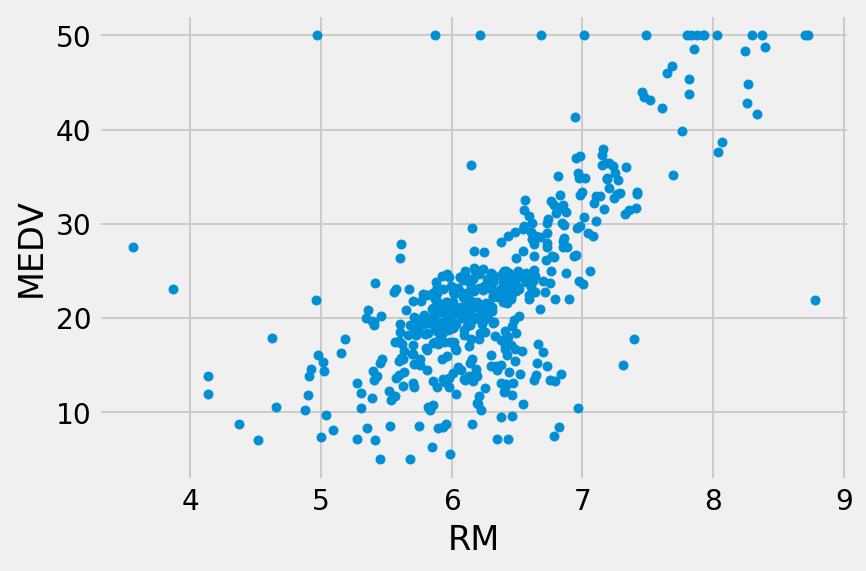

In [44]:
ax = boston.plot.scatter(x = 'RM', y ='MEDV')
#I'm not sure how I can plot the predictions with more than one variable

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [45]:
# A: 70/30 split
X = boston[['AGE','RM','CRIM']]
y = boston.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)


lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred))

32.32478800474085


In [46]:
# 90/10 split
X = boston[['AGE','RM','CRIM']]
y = boston.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state = 1)


lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred))

36.28510834145439


In [ ]:
# The scores should go down with larger test sizes, I think this was a fluke

### 4. Try K-Folds cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [49]:
# A:
from sklearn import model_selection


In [50]:
kf = model_selection.KFold(n_splits=5, shuffle=True)
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_indices], y.iloc[train_indices])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_indices], lr.predict(X.iloc[test_indices])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 36.876143365596896
R2: 0.5633689177053884

Model 2
MSE: 39.32675874975781
R2: 0.5625066390216364

Model 3
MSE: 26.611642222778507
R2: 0.5628401372988683

Model 4
MSE: 51.99510469765135
R2: 0.5609445913391298

Model 5
MSE: 33.72280783316035
R2: 0.5627092108618545

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 37.70649137378898
Mean of R2 for all folds: 0.5624738992453755


In [51]:
kf = model_selection.KFold(n_splits=6, shuffle=True)
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_indices], y.iloc[train_indices])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_indices], lr.predict(X.iloc[test_indices])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 48.93676487428693
R2: 0.5619838203624936

Model 2
MSE: 27.83640339378203
R2: 0.5634597503916807

Model 3
MSE: 32.25886435776345
R2: 0.56341670955507

Model 4
MSE: 28.08543584738062
R2: 0.5629402878482467

Model 5
MSE: 33.28134164643565
R2: 0.5626148260188835

Model 6
MSE: 54.30018446956291
R2: 0.5633856216980169

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 37.44983243153526
Mean of R2 for all folds: 0.5629668359790653


In [52]:
kf = model_selection.KFold(n_splits=8, shuffle=True)
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_indices], y.iloc[train_indices])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_indices], lr.predict(X.iloc[test_indices])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 31.81161042496474
R2: 0.5633696268803007

Model 2
MSE: 73.83228865871754
R2: 0.5609070244704664

Model 3
MSE: 41.250558354005925
R2: 0.5634576488845685

Model 4
MSE: 47.915526555913665
R2: 0.5626311665954371

Model 5
MSE: 39.33720946548252
R2: 0.5632814646356732

Model 6
MSE: 22.600575963072153
R2: 0.5632295148000384

Model 7
MSE: 23.944870990044123
R2: 0.5633796382970759

Model 8
MSE: 20.45383013290878
R2: 0.5632766409836836

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 37.64330881813868
Mean of R2 for all folds: 0.5629415906934054


In [54]:
kf = model_selection.KFold(n_splits=100, shuffle=True)
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_indices], y.iloc[train_indices])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_indices], lr.predict(X.iloc[test_indices])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 300.36559455052196
R2: 0.5631745158245635

Model 2
MSE: 69.67986775583915
R2: 0.5635275103751058

Model 3
MSE: 13.259575687607958
R2: 0.5636163551567723

Model 4
MSE: 19.032479384574128
R2: 0.5636111537273809

Model 5
MSE: 21.257583428598924
R2: 0.5636122596602089

Model 6
MSE: 105.58526896086397
R2: 0.5635344120258561

Model 7
MSE: 8.044272817396953
R2: 0.5636183789254541

Model 8
MSE: 6.751109854478957
R2: 0.5636227476677926

Model 9
MSE: 4.109087514161224
R2: 0.563627845492939

Model 10
MSE: 329.4397790071024
R2: 0.5632432879370461

Model 11
MSE: 28.09219768119802
R2: 0.5634881610792495

Model 12
MSE: 13.01725453405812
R2: 0.5636275181731492

Model 13
MSE: 48.116224929454994
R2: 0.563554652153177

Model 14
MSE: 51.64181317843362
R2: 0.5635570671932141

Model 15
MSE: 6.530176395709011
R2: 0.5636285678804376

Model 16
MSE: 3.0443464314800055
R2: 0.563630219878727

Model 17
MSE: 21.033161196561483
R2: 0.5636027362055084

Model 18
MSE: 1

In [ ]:
#The average MSE goes down very slightly with more folds, I tried 100 and it went down a little bit more

### 5. [Bonus] optimize the $R^2$ score

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [8]:
# A:

### 5.1 Can you explain what could be wrong with this approach?

In [9]:
# A:

### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [10]:
import patsy

# A: